In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
#df = df.drop(['Cabin','Ticket'])
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,262.3750,C
132,1024,1,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,25.4667,S
378,1270,0,1,"Hipkins, Mr. William Edward",male,55.0,0,0,50.0000,S
157,1049,1,3,"Lundin, Miss. Olga Elida",female,23.0,0,0,7.8542,S
183,1075,0,3,"Lane, Mr. Patrick",male,NaN,0,0,7.7500,Q
233,1125,0,3,"Linehan, Mr. Michael",male,NaN,0,0,7.8792,Q
58,950,0,3,"Davison, Mr. Thomas Henry",male,NaN,1,0,16.1000,S
258,1150,1,2,"Bentham, Miss. Lilian W",female,19.0,0,0,13.0000,S
374,1266,1,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,81.8583,S
327,1219,0,1,"Rosenshine, Mr. George (Mr George Thorne"")""",male,46.0,0,0,79.2000,C


In [16]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [13]:
df.shape

(418, 12)

In [69]:
def countsurvivors(series):
        return (series==1).sum()

#df.groupby(["Sex"])["Survived"].value_counts(df["Survived"==1])
df.groupby(["Sex"])["Survived"].apply(countsurvivors).reset_index(name='count')

,Sex,count
0,female,152
1,male,0


In [24]:
df.groupby()['Survived'].mean()

0.36363636363636365

In [7]:
df["Sex"].value_counts().values

array([266, 152], dtype=int64)

In [40]:
df.groupby(["Survived"]).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,1102.620301,2.334586,30.272732,0.379699,0.274436,27.527877
1,1096.789474,2.144737,30.272362,0.565789,0.598684,49.747699


<AxesSubplot: xlabel='Sex'>

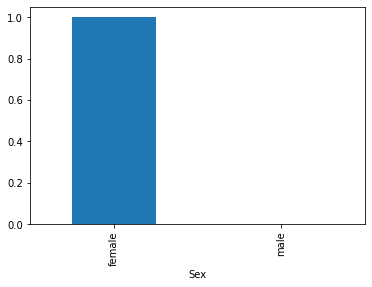

In [64]:
df.groupby("Sex")["Survived"].mean().plot.bar()

In [66]:
df["Survived"]

1      1
4      1
6      1
8      1
12     1
      ..
409    1
410    1
411    1
412    1
414    1
Name: Survived, Length: 152, dtype: int64

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
df.groupby("Age")
df[df['Age']<18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
21,913,0,3,"Olsen, Master. Artur Karl",male,9.00,0,1,C 17368,3.1708,NaN,S
55,947,0,3,"Rice, Master. Albert",male,10.00,4,1,382652,29.1250,NaN,Q
60,952,0,3,"Dika, Mr. Mirko",male,17.00,0,0,349232,7.8958,NaN,S
64,956,0,1,"Ryerson, Master. John Borie",male,13.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
80,972,0,3,"Boulos, Master. Akar",male,6.00,1,1,2678,15.2458,NaN,C
89,981,0,2,"Wells, Master. Ralph Lester",male,2.00,1,1,29103,23.0000,NaN,S
104,996,1,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.00,1,1,2625,8.5167,NaN,C
117,1009,1,3,"Sandstrom, Miss. Beatrice Irene",female,1.00,1,1,PP 9549,16.7000,G6,S
120,1012,1,2,"Watt, Miss. Bertha J",female,12.00,0,0,C.A. 33595,15.7500,NaN,S


In [15]:
df[df['Age']<18].groupby(["Sex",'Pclass'])['Survived'].mean()

Sex     Pclass
female  2         1.0
        3         1.0
male    1         0.0
        2         0.0
        3         0.0
Name: Survived, dtype: float64

In [28]:
df["Sex"] = df['Sex'].map({'male':0,'female':1})
df['Embarked'] = df['Embarked'].map({'S':0 , 'C':1 , 'Q':2})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0
416,1308,0,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0


In [29]:
age_mean=df['Age'].mean()
df['Age'].fillna(age_mean,inplace=True)

fare_mean = df['Fare'].mean()
df['Fare'].fillna(fare_mean , inplace=True)

In [30]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
46,938,0,1,"Chevre, Mr. Paul Romaine",0,45.00000,0,0,PC 17594,29.7000,A9,1
346,1238,0,2,"Botsford, Mr. William Hull",0,26.00000,0,0,237670,13.0000,NaN,0
182,1074,1,1,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",1,18.00000,1,0,113773,53.1000,D30,0
120,1012,1,2,"Watt, Miss. Bertha J",1,12.00000,0,0,C.A. 33595,15.7500,NaN,0
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",1,30.27259,0,0,334915,7.7208,NaN,2


In [32]:
x=df.drop(columns=['Name','Ticket','Cabin','Survived'])
y=df['Survived']

x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2)



model = DecisionTreeClassifier()
model.fit(x_train,y_train)

predictions = model.predict(x_test)
score = accuracy_score(y_test,predictions)
print(score)

1.0


In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
score = accuracy_score(y_test, predictions)
print(score)

1.0


c:\users\muhammad hamid saeed\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
